In [9]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegressionCV

# Sklearn helpers
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import log_loss

# Plotting results
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import matplotlib
matplotlib.rcParams['font.size'] = 18

# Keras for neural networks
import keras 
import tensorflow as tf

from keras import models, layers, optimizers, losses, metrics, callbacks

In [10]:
def calc_log_loss(valid_predictions, name):
    log_loss_value = log_loss(Y_valid, valid_predictions)
    print('Log Loss for {}: {:.6f}.'.format(name, log_loss_value))

In [11]:
def write_submit(test_predictions, filename):
    results = pd.DataFrame({'id': ids, 'probability': list(test_predictions)})
    filepath = 'submissions/%s.csv' % filename
    results.to_csv(filepath, index = False)
    print('Results saved to %s' % filepath)

In [12]:
# Plot the training history of a keras model
def plot_history(history):
    val_loss = history.history['val_loss']
    train_loss = history.history['loss']
    epochs = [int(i) for i in list(range(1, len(val_loss) + 1))]
    
    plt.figure(figsize=(8, 6))
    
    plt.plot(epochs, train_loss, 'bo-', label = 'training loss')
    plt.plot(epochs, val_loss, 'ro-', label = 'validation loss')
    plt.xlabel('Epoch'); plt.ylabel('Log Loss'); plt.title('Training Curves')
    plt.legend();
    plt.show()

In [13]:
def keras_model(model_checkpoint):
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'elu', input_dim = X.shape[1]))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation = 'elu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation = 'elu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation = 'elu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation = 'elu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))

    model.compile(loss = losses.binary_crossentropy,
                  metrics = [losses.binary_crossentropy],
                  optimizer = optimizers.Adam())
    
    callback_list = [callbacks.ModelCheckpoint(filepath='models/%s.hdf5' % model_checkpoint, 
                                           save_best_only = True, monitor = 'val_loss'),
                callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)]

    X_train_array = np.array(X)
    X_valid_array = np.array(X_valid)
    X_test_array = np.array(X_test)
    
    history = model.fit(X_train_array, Y, epochs = 25, batch_size = 128, 
                    validation_split = 0.2, callbacks=callback_list) 

    model.load_weights('models/%s.hdf5' % model_checkpoint)
    
    valid_predictions = model.predict(X_valid_array)[:, 0]
    test_predictions = model.predict(X_test_array)[:, 0]
    
    return history, valid_predictions, test_predictions

# Tournament 103

In [14]:
def format_data():
    train = pd.read_csv('../data/numerai_training_data.csv')
    test = pd.read_csv('../data/numerai_tournament_data.csv')
    
    features = [f for f in list(train) if "feature" in f]
    X = train[features]
    Y = train.target
    X_test = test[features]
    ids = test['id']
    
    X_valid = test.ix[test['data_type'] == 'validation', features]
    Y_valid = test.ix[test['data_type'] == 'validation', 'target']
    
    return X, Y, X_valid, Y_valid, X_test, ids

X, Y, X_valid, Y_valid, X_test, ids = format_data()

In [15]:
history, keras_valid_predictions, keras_test_predictions = keras_model('dnn_103_1')

Train on 314890 samples, validate on 78723 samples
Epoch 1/25
314890/314890 [==============================] - 66s 211us/step - loss: 0.6965 - binary_crossentropy: 0.6965 - val_loss: 0.6933 - val_binary_crossentropy: 0.6933
Epoch 2/25
314890/314890 [==============================] - 55s 175us/step - loss: 0.6938 - binary_crossentropy: 0.6938 - val_loss: 0.6935 - val_binary_crossentropy: 0.6935
Epoch 3/25
314890/314890 [==============================] - 60s 192us/step - loss: 0.6934 - binary_crossentropy: 0.6934 - val_loss: 0.6934 - val_binary_crossentropy: 0.6934
Epoch 4/25
314890/314890 [==============================] - 47s 150us/step - loss: 0.6935 - binary_crossentropy: 0.6935 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 5/25
314890/314890 [==============================] - 46s 146us/step - loss: 0.6935 - binary_crossentropy: 0.6935 - val_loss: 0.6937 - val_binary_crossentropy: 0.6937
Epoch 6/25
314890/314890 [==============================] - 54s 173us/step - loss: 0

In [16]:
calc_log_loss(keras_valid_predictions, name = 'keras_103_1')

Log Loss for keras_103_1: 0.692764.


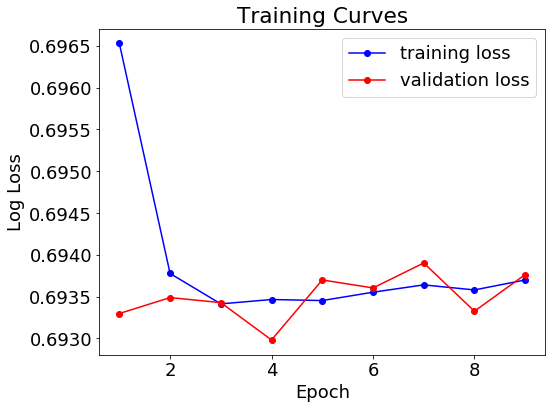

In [17]:
plot_history(history)

In [19]:
write_submit(keras_test_predictions, filename = 'keras_103_1')

Results saved to submissions/keras_103_1.csv


# Tournament 104